# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [1]:
!pip install scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.


In [2]:
!pip install scikit-plot

In [3]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2



## Load Dataset

In [4]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): apache-2.0
 94% 62.0M/66.0M [00:00<00:00, 174MB/s]
100% 66.0M/66.0M [00:00<00:00, 186MB/s]


In [5]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
  inflating: creditcard.csv          


In [6]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)

In [9]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [10]:
# ### 2.1 Summary Statistics
# Display summary statistics for the dataset
######################################################
###################### TO DO #########################
######################################################
df.describe()
######################################################
######################################################
######################################################

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


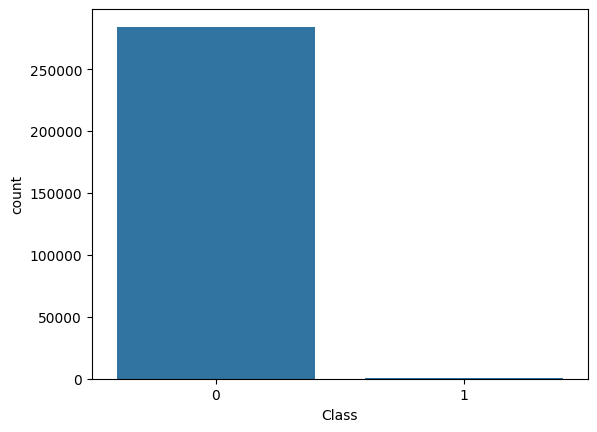

In [11]:
# ### 2.2 Class Distribution
# Visualize the class distribution
######################################################
###################### TO DO #########################
######################################################
plt.figure()
sns.countplot(df, x='Class')
plt.show()
######################################################
######################################################
######################################################

In [12]:
# Display the class distribution in percentages
######################################################
###################### TO DO #########################
######################################################
print('Class Distribution:')
y.value_counts(normalize=True, sort=True)
######################################################
######################################################
######################################################

Class Distribution:


,proportion
Class,
0,0.998273
1,0.001727


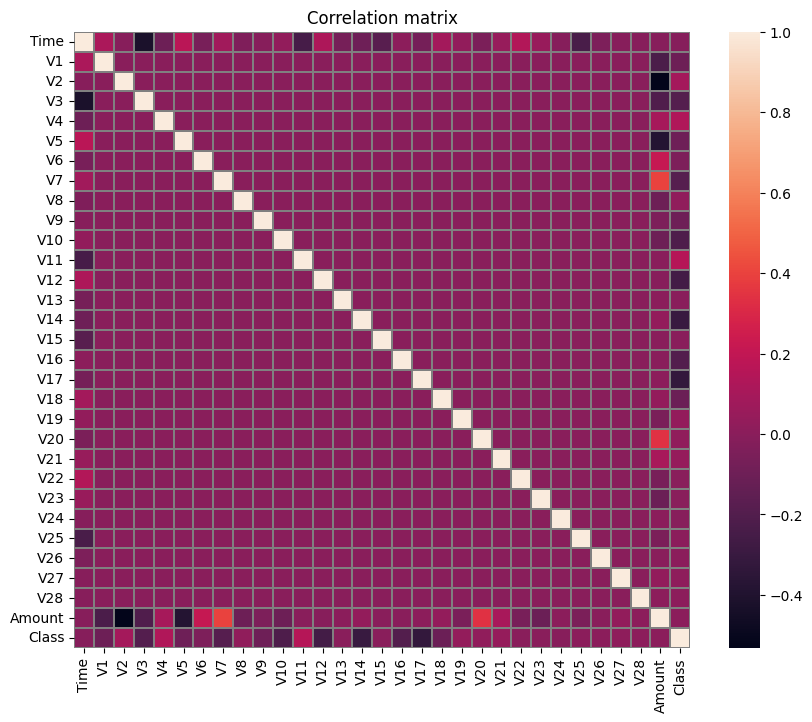

In [35]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix
######################################################
###################### TO DO #########################
######################################################
plt.figure(figsize=(10,8))
plt.title('Correlation matrix')
sns.heatmap(df.corr(), linewidths=0.2, square=True, linecolor='gray')
plt.show()
######################################################
######################################################
######################################################

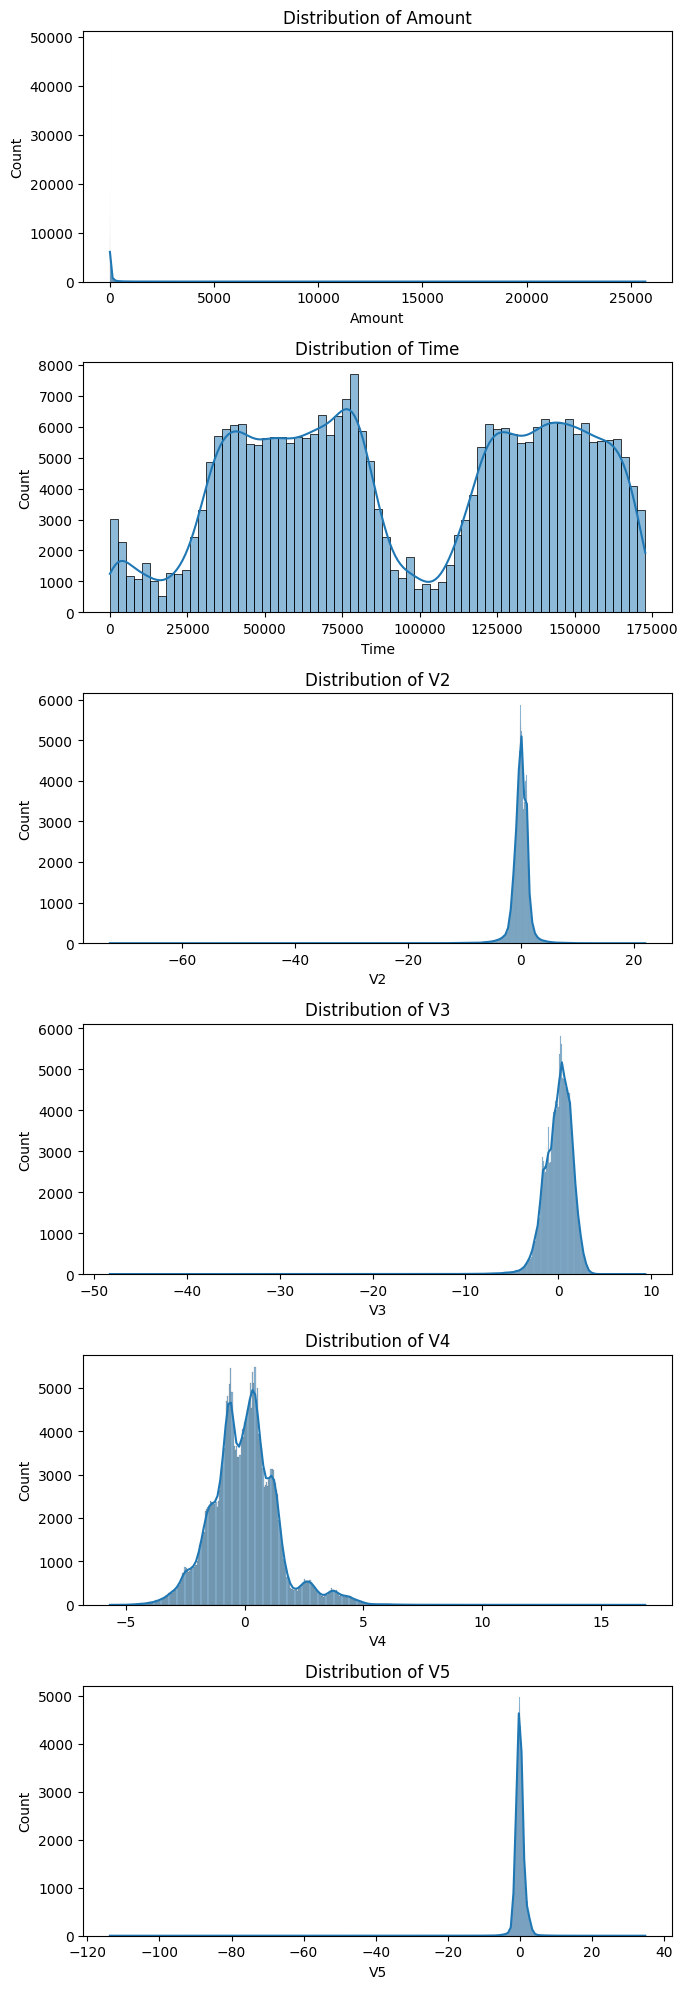

In [14]:
# ### 2.4 Feature Distributions
# Plot the distribution of a few selected features
######################################################
###################### TO DO #########################
######################################################
features = ['Amount', 'Time', 'V2', 'V3', 'V4', 'V5']

plt.figure(figsize=(7, 20))
for i, feature in enumerate(features, start=1):
    plt.subplot(6, 1, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()
######################################################
######################################################
######################################################

In [15]:
##########################################################
### You can add more creative analysis to learn more...###
##########################################################
df.info()
##########################################################
##########################################################
##########################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

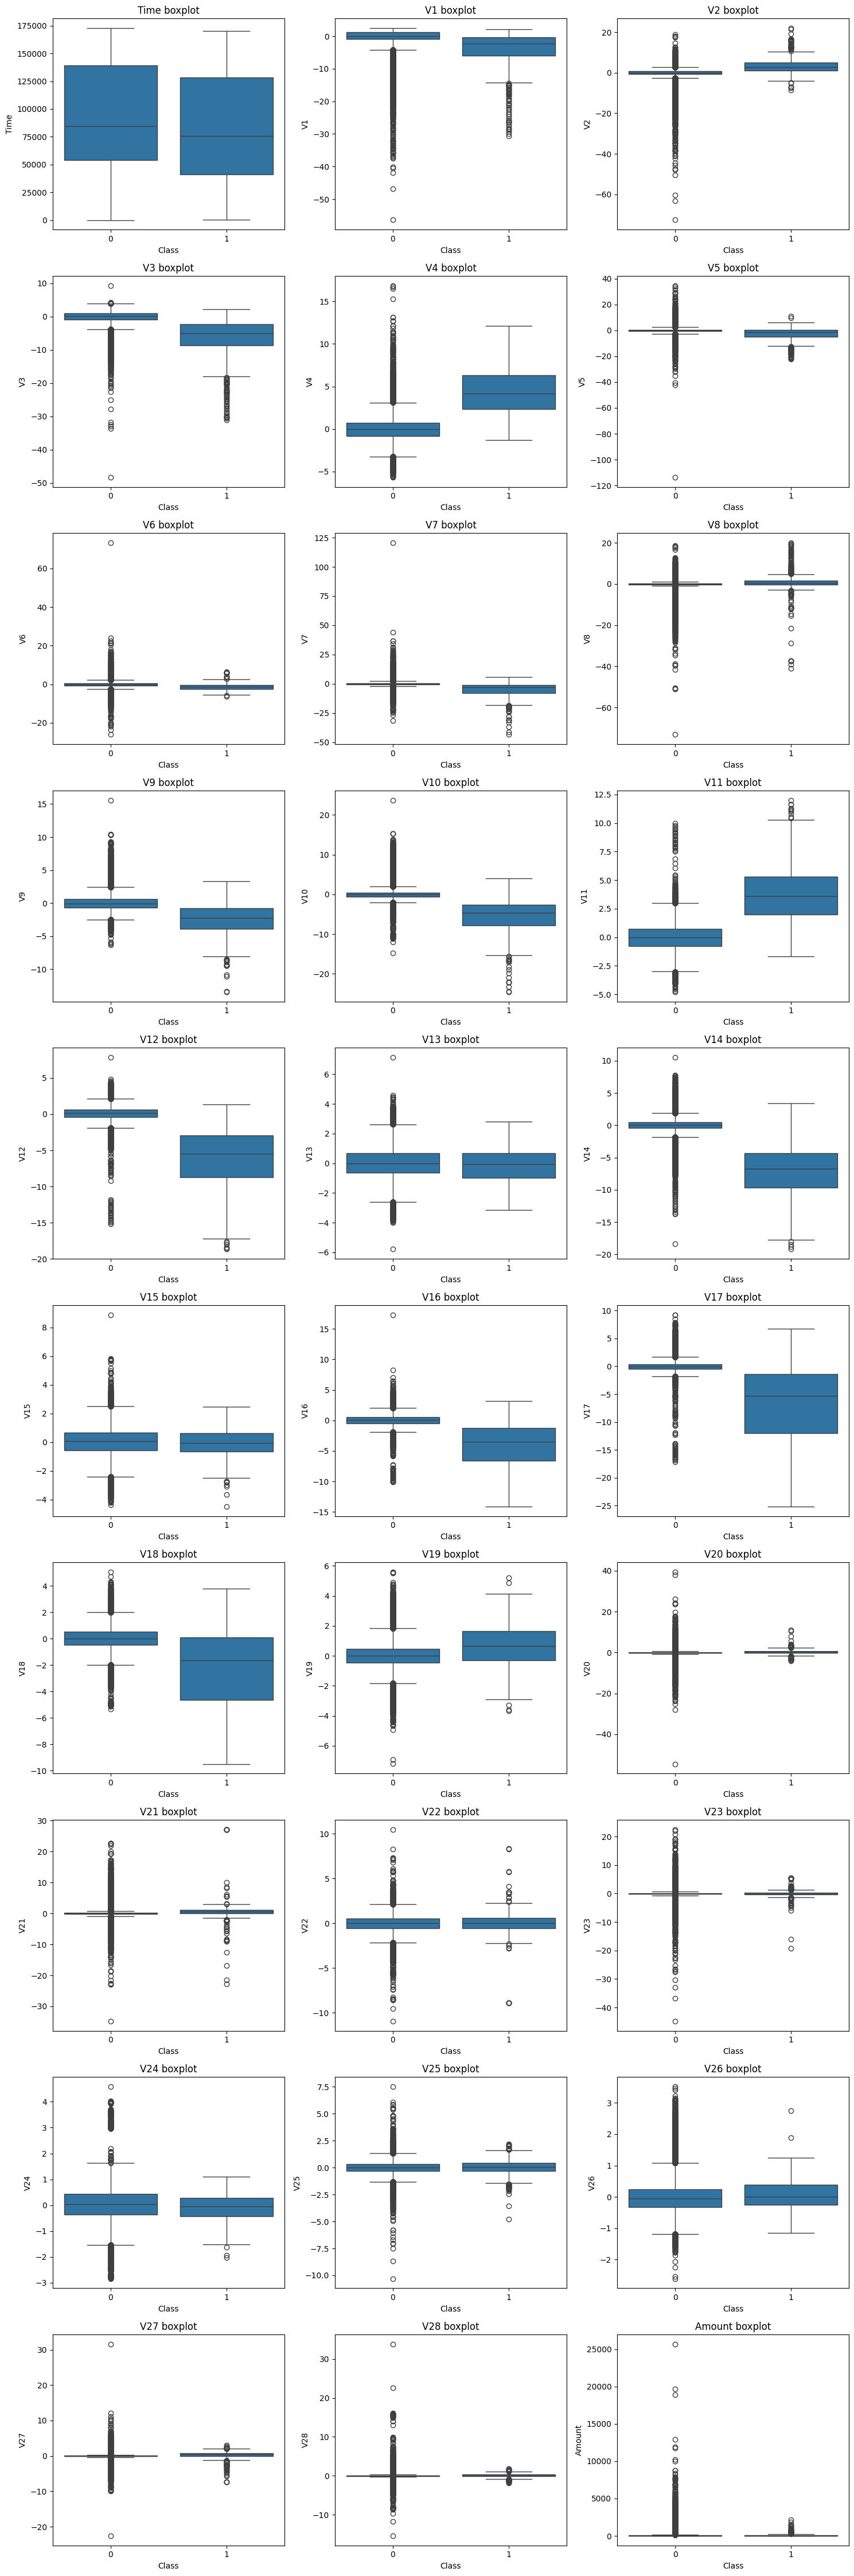

In [16]:
plt.figure(figsize=(15, 45))
for i, column in enumerate(X_train.columns, start=1):
    plt.subplot(10, 3, i)
    plt.title(f'{column} boxplot')
    sns.boxplot(x=df.Class, y=df[column])
plt.tight_layout()
plt.show()

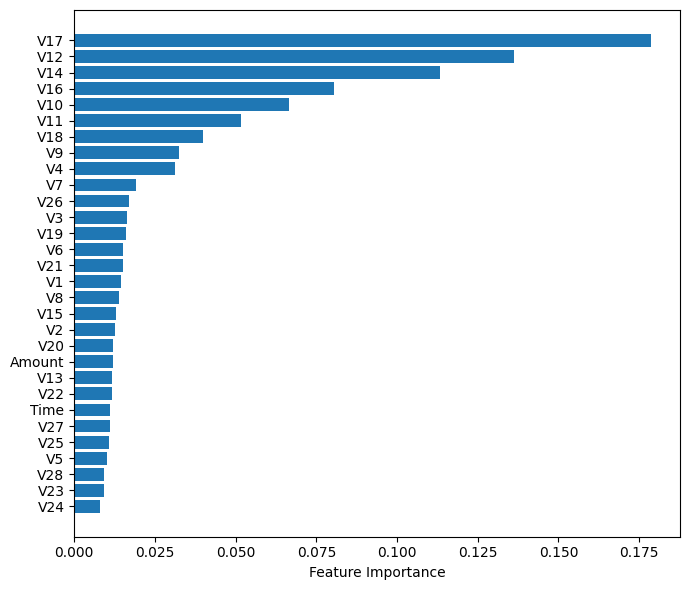

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train[:50000], y_train[:50000])

sort = rf.feature_importances_.argsort()

plt.figure(figsize=(7, 6))
plt.barh(df.columns[sort], rf.feature_importances_[sort])

plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.
>1. The most obvious yet critical challenge would be the number of available columns each having insignificant correlations. Reducing the number of columns requires column analyzing and significance checking.
>2. The second problem will be the heavily imbalanced dataset ( 0.998273 | 0.001727 ). The solution would be oversampling using SMOTE which might result in underfitting due to many copied samples and vast generilization.
>3. There is no high correlation between any of the columns and the actual classes, which makes data preprocessing and feature selection even more crucial.
>4. Values of some columns range from negative numbers to high positive numbers resulting in nonnormalized data.
2. Analyze the correlation matrix of the features.
>Using the correlation matrix we can understand some features like V1, V2, and V3 have negative correlations with Amount which can help detect non-fraud purchases; On the other hand features like V6, V7, V20 have positive correlations with amount.
3. Is your data linearly separable? Please provide a rationale.
>No, the data before preprocessing shows no clear correlation to the target class. There are also no separate features guaranteeing good results. Using techniques like PCA will only show inseparable classes.

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


### Using robust scaler to handle outliers

> Using RandomForestClassifier we can find features with the most impact.
we'll use 0.025 as our threshhold and use all above it

In [18]:
df.columns[sort][::-1]

Index(['V17', 'V12', 'V14', 'V16', 'V10', 'V11', 'V18', 'V9', 'V4', 'V7',
       'V26', 'V3', 'V19', 'V6', 'V21', 'V1', 'V8', 'V15', 'V2', 'V20',
       'Amount', 'V13', 'V22', 'Time', 'V27', 'V25', 'V5', 'V28', 'V23',
       'V24'],
      dtype='object')

In [19]:
selected_features = ['V17', 'V12', 'V14', 'V16', 'V10', 'V11', 'V18', 'V9', 'V4']

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])

### Oversampling frauds using SMOTE

In [20]:
######################################################
###################### TO DO #########################
######################################################
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f'Original class count:')
print(y_train.value_counts())
print()
print(f'Oversampled class count:')
print(pd.Series(y_train_smote).value_counts())
######################################################
######################################################
######################################################

Original class count:
Class
0    199008
1       356
Name: count, dtype: int64

Oversampled class count:
Class
0    199008
1    199008
Name: count, dtype: int64


## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








### Logistic Regression


Logistic Regression Preprocessed Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.61      0.71       136

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Logistic Regression Confusion Matrix:


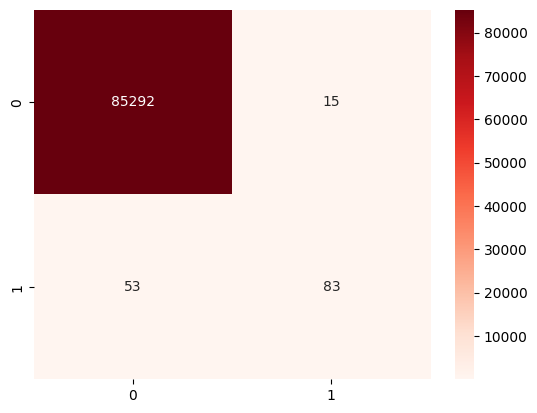

In [21]:
logistic_regression_no_smote = LogisticRegression(max_iter=10000)

logistic_regression_no_smote.fit(X_train_scaled, y_train)
y_no_smote_pred = logistic_regression_no_smote.predict(X_test_scaled)

print("\nLogistic Regression Preprocessed Data Classification Report:")
print(classification_report(y_test, y_no_smote_pred))
print('Logistic Regression Confusion Matrix:')

sns.heatmap(confusion_matrix(y_test, y_no_smote_pred), fmt='g', annot=True, cmap='Reds')
plt.show()


Logistic Regression Preprocessed Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.92      0.09       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Logistic Regression Confusion Matrix:


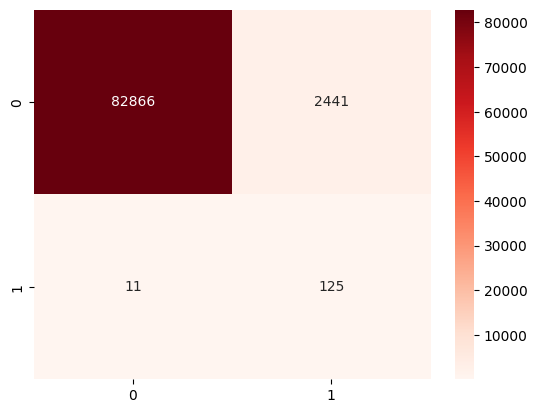

In [22]:
######################################################
###################### TO DO #########################
######################################################
logistic_regression_smote = LogisticRegression(max_iter=10000)

logistic_regression_smote.fit(X_train_smote, y_train_smote)
y_pred = logistic_regression_smote.predict(X_test_scaled)

print("\nLogistic Regression Preprocessed Data Classification Report:")
print(classification_report(y_test, y_pred))
print('Logistic Regression Confusion Matrix:')

sns.heatmap(confusion_matrix(y_test, y_pred), fmt='g', annot=True, cmap='Reds')
plt.show()
######################################################
######################################################
######################################################

### BEST MODEL


Logistic Regression Preprocessed Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.63      0.70       136

    accuracy                           1.00     85443
   macro avg       0.89      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Logistic Regression Confusion Matrix:


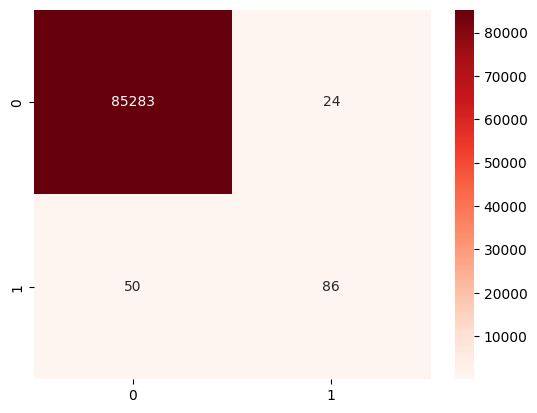

In [23]:
######################################################
###################### TO DO #########################
######################################################
logistic_regression_unscaled = LogisticRegression(max_iter=10000)

logistic_regression_unscaled.fit(X_train, y_train)
y_pred = logistic_regression_unscaled.predict(X_test)

print("\nLogistic Regression Preprocessed Data Classification Report:")
print(classification_report(y_test, y_pred))
print('Logistic Regression Confusion Matrix:')

sns.heatmap(confusion_matrix(y_test, y_pred), fmt='g', annot=True, cmap='Reds')
plt.show()
######################################################
######################################################
######################################################

### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.71      0.81       136

    accuracy                           1.00     85443
   macro avg       0.97      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443

SVM Classification Confusion Matrix:


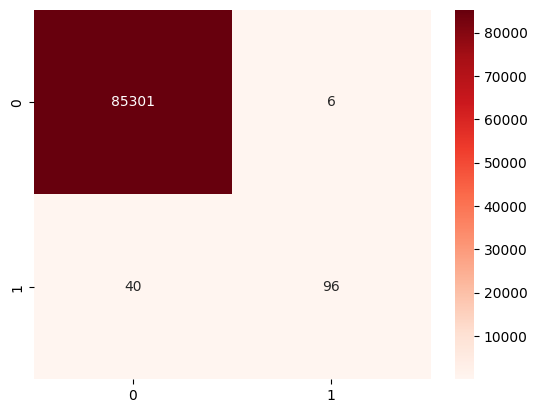

In [24]:
######################################################
###################### TO DO #########################
######################################################

# Since SVM do not perform well on big datasets, we'll limit the amount
# Recall accuracy for class 1 will increase upward if the training continues
# Unfortunatly it takes a long time and might not be the best approach for large datasets

svc = SVC(random_state=101)

svc.fit(X_train_smote[:150000], y_train_smote[:150000])
y_svc_pred = svc.predict(X_test_scaled)

print("\nSVM Classification Report:")
print(classification_report(y_test, y_svc_pred))
print('SVM Classification Confusion Matrix:')

sns.heatmap(confusion_matrix(y_test, y_svc_pred), fmt='g', annot=True, cmap='Reds')
plt.show()
######################################################
######################################################
######################################################

## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?
> Although SVM shows promising results, it will drastically take a very long time to train due to its nature. Thus the approach might not be the best solution to our problem. On the other hand, we can tune LogisticRegression upwards to 92% Recall for fraud detection with feature engineering and dataset preprocessing.
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
> Accuracy does not evaluate our problem correctly. Our dataset is heavily imbalanced and biased towards non-fraud purchases. Therefore a model simply saying "No" will have 90% accuracy.
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?
>1. Data Sampling ( Oversampling using SMOTE in this case )
>2. Data Normalization ( Using RobustScalar to handle outliers too )
>3. Feature Engineering and selecting the most correlated features.
>4. Gathering more real fraudulent datasets.

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

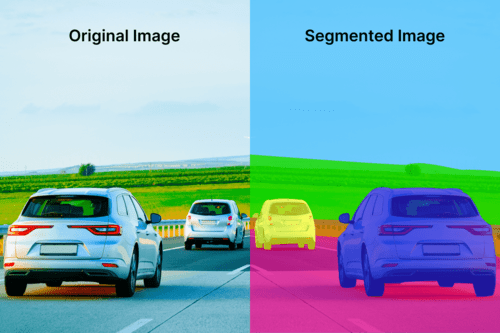

## Load Data

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg
100% 36.2k/36.2k [00:00<00:00, 73.4MB/s]


In [27]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


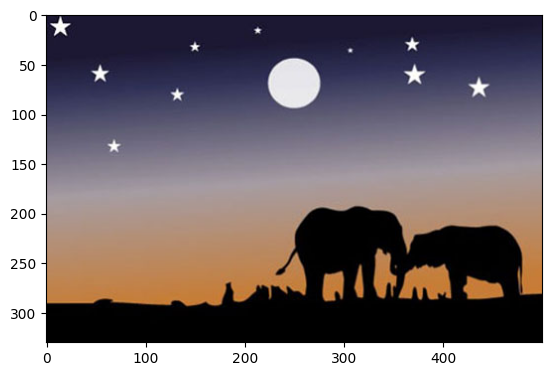

In [28]:
plt.imshow(im) # as RGB Format
plt.show()

In [29]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








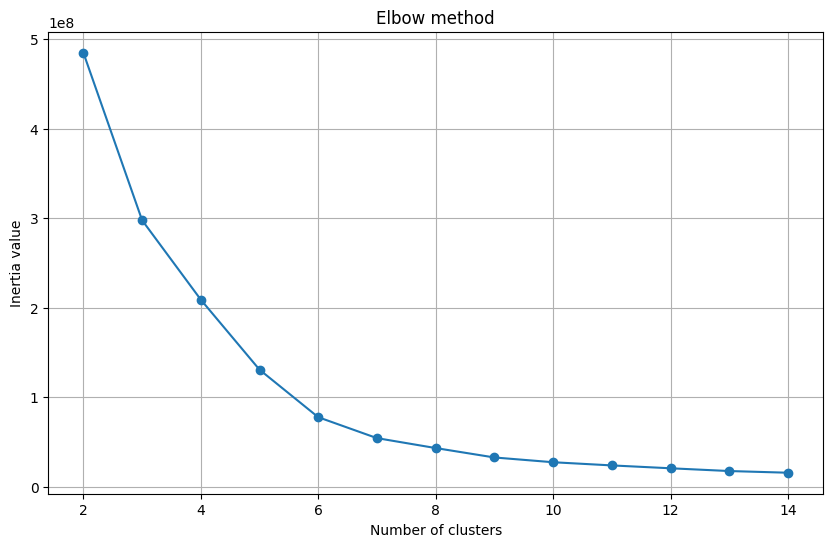

In [30]:
# Using KMean Inertia
######################################################
###################### TO DO #########################
######################################################
inertias = []
k_values = range(2, 15)

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=101)
    kmeans.fit(all_pixels)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia value')
plt.grid(True)
plt.show()
######################################################
######################################################
######################################################

## Visualize Dominant Color

In [31]:
# Now that you have the number of dominant colors (clusters),
# use clustering to determine the cluster of each pixel.
######################################################
###################### TO DO #########################
######################################################
dominant_colors = kmeans.cluster_centers_
best_cluster_count = 10
kmeans = KMeans(n_clusters=best_cluster_count, random_state=101)
######################################################
######################################################
######################################################
kmeans.fit(all_pixels)

KMeans(n_clusters=10, random_state=101)

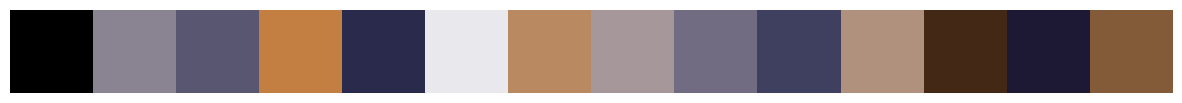

In [32]:
#######Plot the each of dominant color as image#######
####### Dominant colors are center of cluster ########
###################### TO DO #########################
plt.figure(figsize=(15, 3))
plt.imshow([dominant_colors.astype(int)])
plt.axis(False)
plt.show()
######################################################
######################################################
######################################################

## Segmenting original image

In [33]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


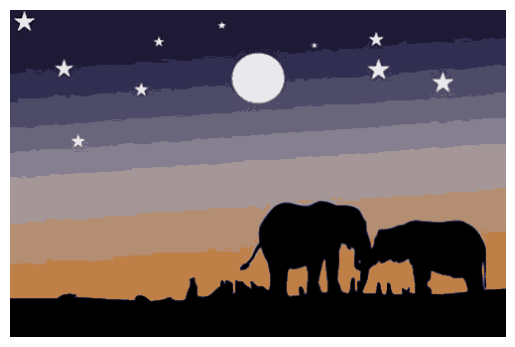

In [34]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img_colored = new_img.reshape((original_shape))
plt.imshow(new_img_colored)
plt.axis(False)
plt.show()